TRASNSCRIPT GENERATION SYSTEM

A Transcript Generation System is a software application designed to automate the creation of academic transcripts for students. It takes relevant student data and course information, processes it according to predefined templates, and generates a formal document that represents a student’s academic history. The system is often integrated with an institution’s student information system (SIS) or learning management system (LMS).

In [ ]:
def startFeature():
    # Lists to store selected student levels and degrees
    stdLevel = []
    stdDegree = []

    # Welcome message
    print("\033[1mWelcome to the PUP Student Transcript Generation System!\033[0;0m")

    # Main loop to handle the student level selection
    while True:
        # Display student level options
        print("=" * 55)
        print("Select Student Level:")
        print("U: Undergraduate")
        print("G: Graduate")
        print("B: Both Undergraduate and Graduate")
        print("=" * 55)

        # Prompt user to select a student level
        stdLevelInput = input("Select student level (Enter to start over): ").upper().strip()

        # Restart the process if input is empty
        if stdLevelInput == "":
            clearOutput(0)  # Clears the screen/output
            startFeature()  # Restart the feature
            return  # Exit the current instance of the function

        # Validate the user input for student level
        if stdLevelInput in ['U', 'G', 'B']:
            if stdLevelInput == 'U':  # Undergraduate level selected
                stdLevel.append('U')
                stdDegree.append('BS1')  # Default undergraduate degree
            elif stdLevelInput == 'G':  # Graduate level selected
                stdLevel.append('G')
            elif stdLevelInput == 'B':  # Both levels selected
                stdLevel.extend(['U', 'G'])  # Add both undergraduate and graduate levels
                stdDegree.append('BS1')  # Add undergraduate degree for both levels
        else:
            # Handle invalid input for student level
            print("\033[1mInvalid student level. Please try again.\033[0;0m")
            print()
            continue  # Re-prompt the user for a valid student level

        # If Graduate level or Both levels are selected
        if stdLevelInput in ['G', 'B']:
            while True:
                # Display degree level options
                print("\nSelect Degree Level: ")
                print("M: Master")
                print("D: Doctorate")
                print("B0: Both Master and Doctorate")
                print("=" * 55)

                # Prompt user to select a degree level for graduate studies
                stdDegreeInput = input("For Graduate level, select the degree (Enter to start over): ").upper().strip()

                # Restart the process if input is empty
                if stdDegreeInput == "":
                    clearOutput(0)  # Clears the screen/output
                    startFeature()  # Restart the feature
                    return  # Exit the current instance of the function

                # Validate the user input for graduate degree
                if stdDegreeInput in ['M', 'D', 'B0']:
                    if stdDegreeInput == 'M':  # Master's degree selected
                        stdDegree.append('M1')  # Add Master's degree
                    elif stdDegreeInput == 'D':  # Doctorate degree selected
                        stdDegree.append('D1')  # Add Doctorate degree
                    elif stdDegreeInput == 'B0':  # Both degrees selected
                        stdDegree.extend(['M1', 'D1'])  # Add both Master's and Doctorate degrees
                    break  # Exit the loop once valid input is provided
                else:
                    # Handle invalid input for degree level
                    print("\033[1mInvalid student degree. Please try again.\033[0;0m")
                    print()

        # Attempt to load student data from the CSV file
        try:
            dataFrame = pd.read_csv("studentDetails.csv")
        except FileNotFoundError:
            print("Error: 'studentDetails.csv' file not found. Please ensure it is in the same directory.")
            sys.exit(1)

        # Loop for validating student ID
        # Loop to handle user input for Student ID
        while True:
            try:
                # Prompt user to enter their Student ID
                user_input = input("\nEnter Student ID (Enter to start over): ")

                # Restart the process if input is empty
                if user_input == "":
                    clearOutput(0)  # Clears the screen/output
                    startFeature()  # Restart the feature
                    return  # Exit the current instance of the function

                # Convert the user input to an integer for validation
                stdID = int(user_input)

                # Check if the entered Student ID exists in the database
                df_results = dataFrame[dataFrame["stdID"] == stdID]

                if not df_results.empty:  # If the ID exists in the database
                    # Extract the student's level from the record
                    studentLevel = df_results['Level'].iloc[0]

                    # Validate the selected student level against the student's record
                    if stdLevelInput not in studentLevel and stdLevelInput != 'B':
                        print(f"\033[1mError: Selected level '{stdLevelInput}' does not match student record level '{studentLevel}'.\033[0;0m\n")
                        continue  # Re-prompt the user for a valid ID

                    # Additional validation if both Undergraduate and Graduate levels are selected
                    if stdLevelInput == 'B' and ('U' not in studentLevel and 'G' not in studentLevel):
                        print("\033[1mError: Both Undergraduate and Graduate levels do not match the student record.\033[0;0m\n")
                        continue  # Re-prompt the user for a valid ID

                    # If all validations pass
                    print("\nStudent ID validated. Proceeding to the menu...\n")
                    clearOutput(3)  # Clear the screen before proceeding
                    menuFeature(stdLevel, stdDegree, stdID)  # Navigate to the menu feature
                    break  # Exit the loop after successful validation
                else:
                    # If the ID does not exist in the database
                    print("\nInvalid ID. Please try again.")

            # Handle non-numeric input for Student ID
            except ValueError:
                print("\nInvalid input. Please enter a valid numeric Student ID.")

The `startFeature()` function is part of a Student Transcript Generation System that guides users through a series of steps to select their student level and degree, and validates their Student ID. Initially, the function displays a welcome message and prompts the user to choose their student level (Undergraduate, Graduate, or Both). If the input is invalid or empty, the process restarts. Based on the level selected, the appropriate degrees are added to the `stdDegree` list, and if the graduate level is chosen, the user is asked to select a degree type (Master’s, Doctorate, or Both). After confirming the user’s selection, the function attempts to load a CSV file containing student data and verifies the entered Student ID against this data. If the ID is valid and matches the student level, the user is granted access to the main menu. If the ID is invalid or does not match the selected level, the user is prompted to try again. Error handling is included to manage invalid or non-numeric ID inputs, and the function also handles file errors if the CSV file is not found. Throughout, the system ensures that only valid inputs are processed, and it clears the screen at appropriate points to maintain a clean user interface.

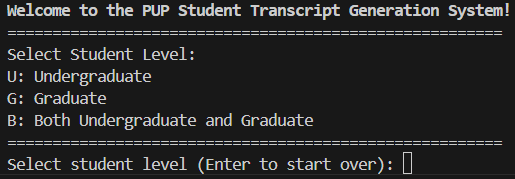

In [ ]:
def menuFeature(stdLevel, stdDegree, stdID):
    requestCounter = 0   # Initialize a counter to track the number of requests made during the session

    while True:
        print("       \033[1mStudent Transcript Generation System Menu\033[0;0m")
        print("=" * 55)
        print("1. Student details")
        print("2. Statistics")
        print("3. Transcript based on major courses")
        print("4. Transcript based on minor courses")
        print("5. Full transcript")
        print("6. Previous transcript requests")
        print("7. Select Another student")
        print("8. Terminate the system")
        print("=" * 55)

        choice = input("\033[1mEnter your feature: \033[0;0m") # Get the user's menu choice

        # repititiom structure to display features 
        if choice == "1":
            requestCounter += 1 # Increment request counter
            featureRequests("Student Details", stdID)  
            detailsFeature(stdID, stdLevel, stdDegree)  
        elif choice == "2":
            requestCounter += 1 # Increment request counter
            featureRequests("Statistics", stdID)
            statisticsFeature(stdID, stdDegree, stdLevel)  
        elif choice == "3":
            requestCounter += 1 # Increment request counter
            featureRequests("Major Transcript", stdID)
            majorTranscriptFeature(stdID, stdDegree, stdLevel)
        elif choice == "4":
            requestCounter += 1 # Increment request counter
            featureRequests("Minor Transcript", stdID)
            minorTranscriptFeature(stdID, stdDegree, stdLevel)
        elif choice == "5":
            requestCounter += 1 # Increment request counter
            featureRequests("Full Transcript", stdID)
            fullTranscriptFeature(stdID, stdDegree, stdLevel)
        elif choice == "6":
            requestCounter += 1 # Increment request counter
            featureRequests("Previous Request", stdID)
            previousRequestsFeature(stdID, stdDegree, stdLevel)
        elif choice == "7":
            requestCounter += 1 # Increment request counter
            newStudentFeature()  # Functionality to select a new student
            break  # Exit the menu loop for a new student

        # Option 8: Terminate the system
        elif choice == "8":
            terminateFeature(requestCounter)  # Handle termination logic
            break  # Exit the menu loop and end the program
        else:
            print("Invalid input. Please try again.")

The `menuFeature()` function is a core part of a Student Transcript Generation System that presents users with a menu of options to select from. Upon entering the menu, the system displays eight options, including viewing student details, statistics, generating transcripts based on major or minor courses, viewing the full transcript, checking previous transcript requests, selecting a different student, or terminating the system. The function initializes a `requestCounter` to track the number of requests made during the session. Each time the user selects an option, the counter is incremented, and the appropriate function is called to handle the selected feature, such as displaying student details or generating transcripts. 
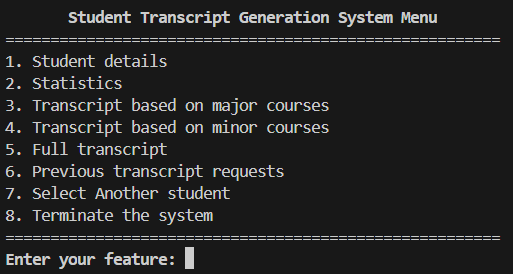

In [ ]:
def detailsFeature(stdID, stdLevel, stdDegree):
    dataFrame = pd.read_csv("studentDetails.csv") # Reads the student details from the CSV file into a DataFrame
    stdDetail = dataFrame[dataFrame["stdID"] == stdID]# Filters the DataFrame to find the specific student by their ID
    stdDetail_txt = ""
    term = ""
    rowLen = len(stdDegree) # Number of degree levels associated with the student

    # Concatenate terms based on the number of degree levels
    for i in range(rowLen):
        if i == 0:
            term += str(stdDetail.Terms.iloc[0])  # Add the first term
        else:
            term += ", " + str(stdDetail.Terms.iloc[i])  # Add subsequent terms with a comma separator

    # Construct the student's detail string
    stdDetail_txt += (f"Name: {stdDetail.Name.iloc[0]}\n"
                      f"stdID: {stdID}\n"
                      f"Level(s): {', '.join(stdLevel)}\n"
                      f"Number of Terms: {term}\n"
                      f"College(s): {stdDetail.College.iloc[0]}\n"
                      f"Department(s): {stdDetail.Department.iloc[0]}\n")

    print("\n" + stdDetail_txt)

    # Write the student details to a text file named after the student's ID
    with open(f"{stdID}details.txt", "w") as f:
        f.write(stdDetail_txt)  # Save the details
        f.close()

    # Clears the screen, waits for a short duration, and returns to the menu feature
    clearOutput(5)


The `detailsFeature()` function retrieves and displays detailed information about a specific student based on their student ID. It begins by reading a CSV file, `studentDetails.csv`, into a DataFrame, then filters this DataFrame to find the student corresponding to the provided `stdID`. The function constructs a string containing the student's personal details, including their name, student ID, level(s), number of terms, college, and department, and stores this string in `stdDetail_txt`. It handles multiple degree levels by concatenating the terms associated with each degree into a single string, separated by commas. The student details are then printed to the screen for the user to view. Additionally, the function writes the student’s details to a text file named after their student ID, saving the same information for future reference. After displaying and saving the details, the screen is cleared, and the program pauses briefly before returning to the main menu, ensuring a smooth transition between different features of the system.
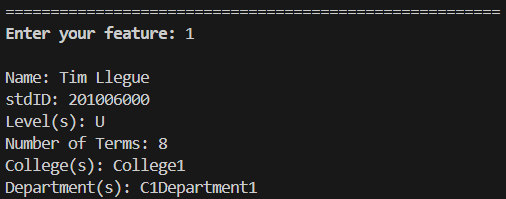


In [ ]:
def statisticsFeature(stdID, stdDegree, stdLevel):
    try:
        # Load student data from CSV file named after student ID
        dataFrame = pd.read_csv(f"{stdID}.csv")
    except FileNotFoundError as e:
        # Handle case where file is not found
        print(f"Error: {e}")
        return
    except pd.errors.EmptyDataError as e:
        # Handle case where the file is empty
        print(f"Error: The file is empty. {e}")
        return
    except Exception as e:
        # Catch any other unexpected errors
        print(f"An unexpected error occurred: {e}")
        return

    stat_txt = ""

    # Process each degree provided in the list
    for degree in stdDegree:
        # Filter data for the current degree
        degreeDf = dataFrame[dataFrame["Degree"].str.contains(degree, na=False)]
        if degreeDf.empty:
            # Handle case where no data is found for the degree
            print(f"No data found for degree: {degree}")
            continue

        # Prepare header based on student level (Undergraduate or Graduate)
        # Determine the correct level type
        if "U" in stdLevel and degree == "BS1":
            level_type = "Undergraduate"
        elif "G" in stdLevel:
            # Map degree codes to readable names
            degree_map = {"M1": "M", "D1": "D"}
            degree_label = degree_map.get(degree, degree)  # Default to original if not mapped
            level_type = f"Graduate ({degree_label})"
        else:
            level_type = "Unknown Level"
        stat_txt += f"""
{'=' * 63}
*******************   {level_type} Level   *******************
{'=' * 63}
"""

        # Compute overall and term averages for grades
        try:
            # Calculate overall average and overall weighted average
            overall_avg = round(statistics.mean(degreeDf["Grade"]), 2)
            stat_txt += f"Overall Average (major and minor) for all terms: {overall_avg}\n"
            stat_txt += f"Average (major and minor) of each term:\n"

            # Calculate average for each term
            for term in degreeDf["Term"].unique():
                termDf = degreeDf[degreeDf["Term"] == term]
                term_avg = round(statistics.mean(termDf["Grade"]), 2)
                stat_txt += f"\tTerm {term}: {term_avg}\n"
        except KeyError as e:
            # Handle missing columns for averages
            print(f"Missing column in data: {e}")
            return

        # Find repeated courses in the degree
        try:
            repeated_courses = degreeDf[degreeDf["courseName"].duplicated()]
            repeated_info = (
                f"Yes, {', '.join(repeated_courses['courseName'].unique())}"
                if not repeated_courses.empty
                else "No"
            )
        except KeyError as e:
            # Handle missing column for course names
            print(f"Missing column in data: {e}")
            return

        # Find maximum and minimum grades
        try:
            max_grade_row = degreeDf.loc[degreeDf["Grade"].idxmax()]
            min_grade_row = degreeDf.loc[degreeDf["Grade"].idxmin()]

            stat_txt += f"""
Maximum grade(s) and in which term(s): Term {max_grade_row['Term']}, Grade {max_grade_row['Grade']}
Minimum grade(s) and in which term(s): Term {min_grade_row['Term']}, Grade {min_grade_row['Grade']}
Do you have any repeated course(s)?: {repeated_info}
"""
        except KeyError as e:
            # Handle missing columns for grades and terms
            print(f"Missing column in data: {e}")
            return

    # Print the statistics text
    print(stat_txt)

    # Save the statistics to a text file
    try:
        with open(f"{stdID}Statistics.txt", "w") as f:
            f.write(stat_txt)
    except Exception as e:
        # Handle errors when writing to the file
        print(f"Error writing to file: {e}")

    # Call a function to clear the output (assuming it's defined elsewhere)
    clearOutput(10)

def majorTranscriptFeature(stdID, stdDegree, stdLevel):
    try:
        # Load student data
        dataFrame = pd.read_csv(f"{stdID}.csv")
        studentDetails = pd.read_csv("studentDetails.csv")
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return

    # Filter student details
    student = studentDetails[studentDetails["stdID"] == stdID]
    if student.empty:
        print(f"No details found for student ID: {stdID}")
        return

    # Prepare the transcript header
    transcript_txt = f"""
Name: {student['Name'].iloc[0]:<26} stdID: {stdID:<15}
College: {student['College'].iloc[0]:<23} Department: {student['Department'].iloc[0]:<15}
Major: {student['Major'].iloc[0]:<25} Minor: {student['Minor'].iloc[0]:<15}
Level: {', '.join(stdLevel):<25} Number of terms: {student['Terms'].iloc[0]:<15}
"""

    overall_major_sum = 0
    total_terms = 0
    term_averages = []

    # Separate processing for undergraduate and graduate levels
    for level in stdLevel:
        level_courses = dataFrame[(dataFrame["Level"] == level) & (dataFrame["courseType"] == "Major")]
        if level_courses.empty:
            continue

        # Process each term
        for term in level_courses.Term.unique():
            termDf = level_courses[level_courses["Term"] == term]
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"{'':^9} {'Term ' + str(term):^35} {'':^9}\n"
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"Course ID   Course Name            Credit Hours   Grade\n"
            transcript_txt += f"{'-' * 55}\n"

            for _, course in termDf.iterrows():
                transcript_txt += (
                    f"{course['courseID']:<12}{course['courseName']:<23}"
                    f"{course['creditHours']:<16}{course['Grade']}\n"
                )

            # Compute the term's major average
            if not termDf.empty:
                term_major_avg = round(statistics.mean(termDf["Grade"]), 2)
                term_averages.append(term_major_avg)
                overall_major_sum += sum(termDf["Grade"])
                total_terms += 1
            else:
                term_major_avg = 0

            # Compute the overall average, adjusting per term based on the mean of term averages
            overall_avg = round(statistics.mean(term_averages), 2) if term_averages else 0

            # Add averages to the transcript
            transcript_txt += f"\nMajor Average = {term_major_avg:<15} Overall Average = {overall_avg}\n"

        transcript_txt += f"{'=' * 55}\n"
        transcript_txt += f"{'**** End of Transcript for Level (' + level + ') ****':^55}\n"
        transcript_txt += f"{'=' * 55}\n\n\n\n"

    # Print the transcript
    print(transcript_txt)

    # Save the transcript to a file
    with open(f"{stdID}MajorTranscript.txt", "w") as f:
        f.write(transcript_txt)

    # Return to the menu
    clearOutput(10)



The statisticsFeature() function generates and displays statistical data about a student's performance based on their records. First, it attempts to load a CSV file containing the student's grades. If the file is missing or empty, or if an error occurs during this process, appropriate error messages are displayed, and the function exits. For each degree the student is pursuing, the function filters the data to match the degree and calculates key statistics such as the overall average grade, term-wise averages, maximum and minimum grades, and whether the student has repeated any courses. It also handles missing or malformed data gracefully. The statistics are formatted into a readable string and printed to the console. 
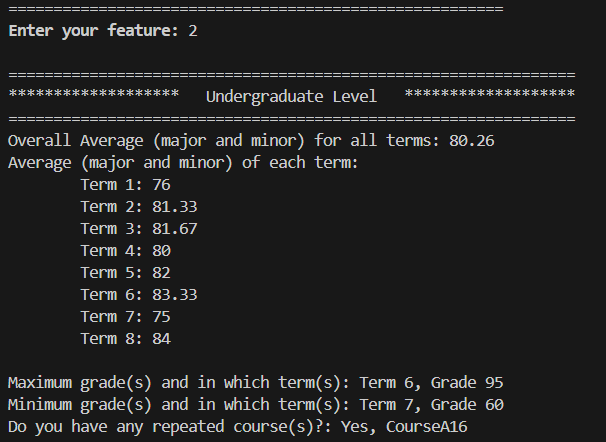


In [ ]:
def majorTranscriptFeature(stdID, stdDegree, stdLevel):
    try:
        # Load student data
        dataFrame = pd.read_csv(f"{stdID}.csv")
        studentDetails = pd.read_csv("studentDetails.csv")
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return

    # Filter student details
    student = studentDetails[studentDetails["stdID"] == stdID]
    if student.empty:
        print(f"No details found for student ID: {stdID}")
        return

    # Prepare the transcript header
    transcript_txt = f"""
Name: {student['Name'].iloc[0]:<26} stdID: {stdID:<15}
College: {student['College'].iloc[0]:<23} Department: {student['Department'].iloc[0]:<15}
Major: {student['Major'].iloc[0]:<25} Minor: {student['Minor'].iloc[0]:<15}
Level: {', '.join(stdLevel):<25} Number of terms: {student['Terms'].iloc[0]:<15}
"""

    overall_major_sum = 0
    total_terms = 0
    term_averages = []

    # Separate processing for undergraduate and graduate levels
    for level in stdLevel:
        level_courses = dataFrame[(dataFrame["Level"] == level) & (dataFrame["courseType"] == "Major")]
        if level_courses.empty:
            continue

        # Process each term
        for term in level_courses.Term.unique():
            termDf = level_courses[level_courses["Term"] == term]
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"{'':^9} {'Term ' + str(term):^35} {'':^9}\n"
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"Course ID   Course Name            Credit Hours   Grade\n"
            transcript_txt += f"{'-' * 55}\n"

            for _, course in termDf.iterrows():
                transcript_txt += (
                    f"{course['courseID']:<12}{course['courseName']:<23}"
                    f"{course['creditHours']:<16}{course['Grade']}\n"
                )

            # Compute the term's major average
            if not termDf.empty:
                term_major_avg = round(statistics.mean(termDf["Grade"]), 2)
                term_averages.append(term_major_avg)
                overall_major_sum += sum(termDf["Grade"])
                total_terms += 1
            else:
                term_major_avg = 0

            # Compute the overall average, adjusting per term based on the mean of term averages
            overall_avg = round(statistics.mean(term_averages), 2) if term_averages else 0

            # Add averages to the transcript
            transcript_txt += f"\nMajor Average = {term_major_avg:<15} Overall Average = {overall_avg}\n"

        transcript_txt += f"{'=' * 55}\n"
        transcript_txt += f"{'**** End of Transcript for Level (' + level + ') ****':^55}\n"
        transcript_txt += f"{'=' * 55}\n\n\n\n"

    # Print the transcript
    print(transcript_txt)

    # Save the transcript to a file
    with open(f"{stdID}MajorTranscript.txt", "w") as f:
        f.write(transcript_txt)

    # Return to the menu
    clearOutput(10)

The `majorTranscriptFeature()` function generates a student's transcript based on their major courses. It first loads the student's data and details from CSV files. After validating the student’s existence, it creates a transcript header with the student's basic information. The function then processes courses for each level (Undergraduate or Graduate), listing courses for each term, calculating term averages, and computing the overall average. The transcript is printed and saved as a text file. Finally, the screen is cleared to return to the menu. The function handles missing data and ensures all information is formatted correctly.
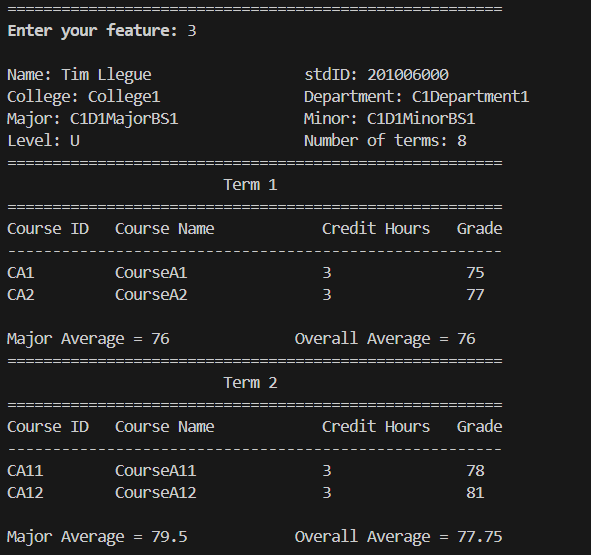
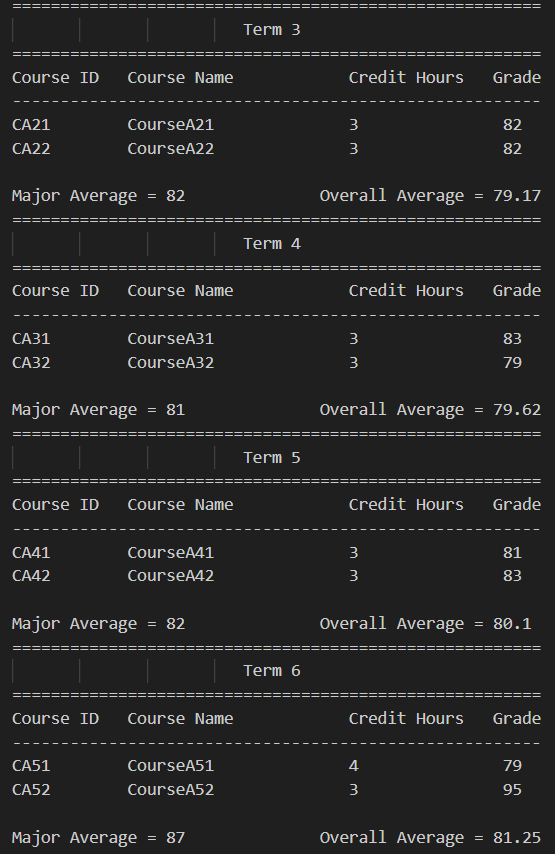
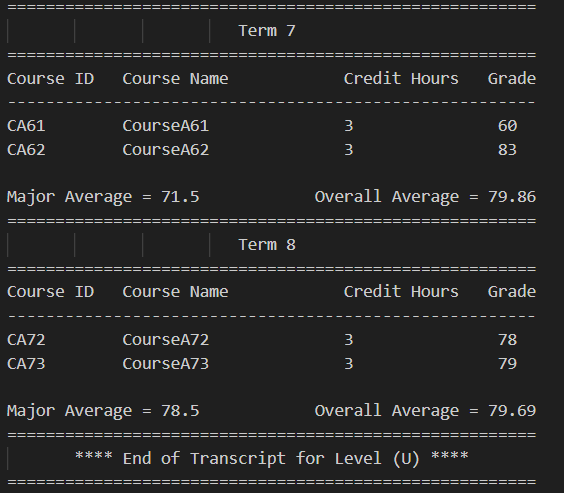

In [ ]:
def minorTranscriptFeature(stdID, stdDegree, stdLevel):
    try:
        # Load student data from CSV files
        dataFrame = pd.read_csv(f"{stdID}.csv")  # Student's grade and course data
        studentDetails = pd.read_csv("studentDetails.csv")  # General student details
    except FileNotFoundError as e:
        # Handle case where the file is not found
        print(f"Error: {e}")
        return

    # Filter the student details using the provided student ID
    student = studentDetails[studentDetails["stdID"] == stdID]
    if student.empty:
        # Handle case where no details are found for the student ID
        print(f"No details found for student ID: {stdID}")
        return

    # Prepare the transcript header with student and academic details
    transcript_txt = f"""
Name: {student['Name'].iloc[0]:<26} stdID: {stdID:<15}
College: {student['College'].iloc[0]:<23} Department: {student['Department'].iloc[0]:<15}
Major: {student['Major'].iloc[0]:<25} Minor: {student['Minor'].iloc[0]:<15}
Level: {', '.join(stdLevel):<25} Number of terms: {student['Terms'].iloc[0]:<15}
"""

    overall_minor_sum = 0  # Sum of all grades for minor courses
    total_terms = 0  # Number of terms with minor courses
    term_averages = []  # List to store the average for each term

    # Separate processing for undergraduate and graduate levels
    for level in stdLevel:
        # Filter courses for the given level and type "Minor"
        level_courses = dataFrame[(dataFrame["Level"] == level) & (dataFrame["courseType"] == "Minor")]
        if level_courses.empty:
            continue  # Skip if there are no minor courses for this level

        # Process each term for the current level
        for term in level_courses.Term.unique():
            termDf = level_courses[level_courses["Term"] == term]
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"{'':^9} {'Term ' + str(term):^35} {'':^9}\n"
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"Course ID   Course Name            Credit Hours   Grade\n"
            transcript_txt += f"{'-' * 55}\n"

            # List the minor courses for the current term
            for _, course in termDf.iterrows():
                transcript_txt += (
                    f"{course['courseID']:<12}{course['courseName']:<23}"
                    f"{course['creditHours']:<16}{course['Grade']}\n"
                )

            # Compute the term's minor average
            if not termDf.empty:
                term_minor_avg = round(statistics.mean(termDf["Grade"]), 2)
                term_averages.append(term_minor_avg)
                overall_minor_sum += sum(termDf["Grade"])
                total_terms += 1
            else:
                term_minor_avg = 0  # No minor courses in the term

            # Compute the overall average for minor courses across all terms
            overall_avg = round(statistics.mean(term_averages), 2) if term_averages else 0

            # Add term and overall averages to the transcript
            transcript_txt += f"\nMinor Average = {term_minor_avg:<15} Overall Average = {overall_avg}\n"

        transcript_txt += f"{'=' * 55}\n"
        transcript_txt += f"{'**** End of Transcript for Level (' + level + ') ****':^55}\n"
        transcript_txt += f"{'=' * 55}\n\n\n\n"

    # Print the generated transcript
    print(transcript_txt)

    # Save the transcript to a text file
    with open(f"{stdID}MinorTranscript.txt", "w") as f:
        f.write(transcript_txt)

    # Call a function to clear the output (assumed to be defined elsewhere)
    clearOutput(10)


The `minorTranscriptFeature()` function generates a student's minor course transcript. It begins by loading the student's grade and course data, as well as their general details from CSV files. If the student is found, the function prepares the transcript header containing their personal and academic information. It then processes each level (Undergraduate or Graduate) to list minor courses by term, calculate term averages, and compute an overall average for minor courses. The transcript is printed and saved to a text file. Finally, the screen is cleared to return to the menu. The function ensures that any missing data or errors are handled gracefully.

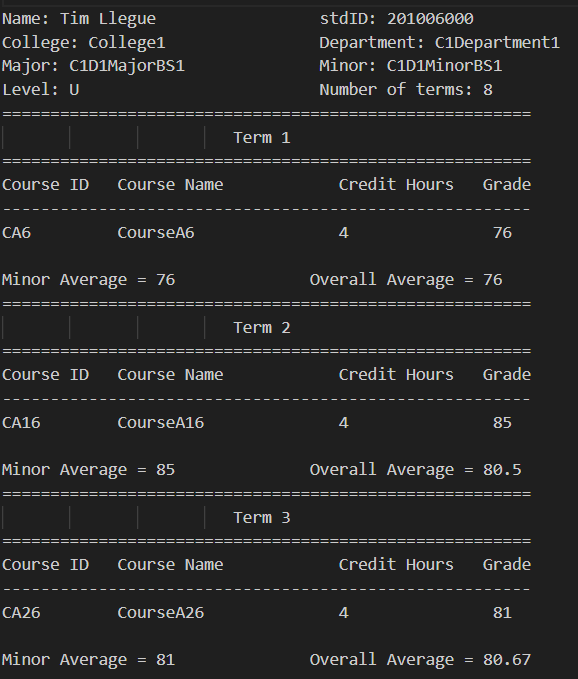 
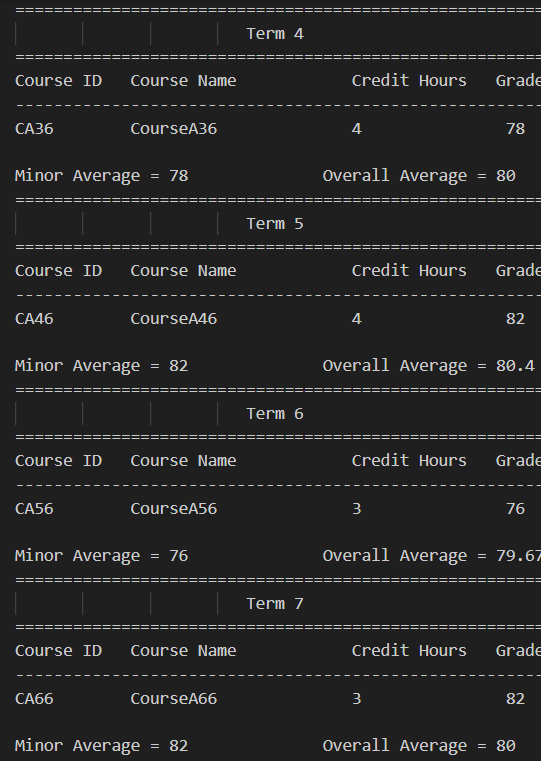
                                     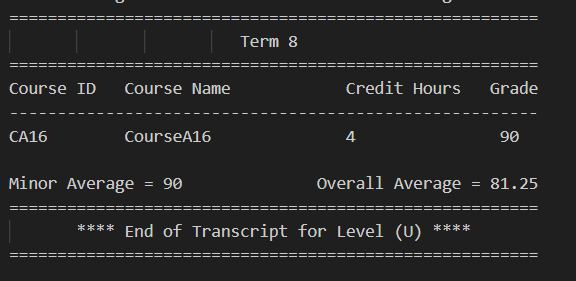

In [ ]:
def fullTranscriptFeature(stdID, stdDegree, stdLevel):
    try:
        # Load student data from CSV files
        dataFrame = pd.read_csv(f"{stdID}.csv")  
        studentDetails = pd.read_csv("studentDetails.csv")  # This file contains general student info
    except FileNotFoundError as e:
        # If a file is missing, handle the exception by printing an error message
        print(f"Error: {e}")
        return

    # Filter student details using the student ID to get the specific student's information
    student = studentDetails[studentDetails["stdID"] == stdID]
    if student.empty:
        # If no student information is found for the given ID, print a message and exit
        print(f"No details found for student ID: {stdID}")
        return

    # Prepare the transcript header, using data from the studentDetails dataframe
    transcript_txt = f"""
Name: {student['Name'].iloc[0]:<26} stdID: {stdID:<15}
College: {student['College'].iloc[0]:<23} Department: {student['Department'].iloc[0]:<15}
Major: {student['Major'].iloc[0]:<25} Minor: {student['Minor'].iloc[0]:<15}
Level: {', '.join(stdLevel):<25} Number of terms: {student['Terms'].iloc[0]:<15}
"""

    # Initialize variables for computing overall statistics
    overall_major_sum = 0
    overall_minor_sum = 0
    overall_total_grades = 0
    overall_total_courses = 0
    major_term_averages = []
    minor_term_averages = []
    overall_term_averages = []

    # Loop through each academic level (e.g., Undergraduate, Graduate)
    for level in stdLevel:
        # Add a header for the current academic level in the transcript
        transcript_txt += f"\n{'=' * 55}\n{' Full Transcript for Level ' + level:^55}\n{'=' * 55}\n"

        # Filter the courses based on the current level
        level_courses = dataFrame[dataFrame["Level"] == level]
        if level_courses.empty:
            # Skip the level if no courses are found for it
            continue

        # Process each term (e.g., Fall, Spring) for the current level
        for term in level_courses.Term.unique():
            termDf = level_courses[level_courses["Term"] == term]
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"{'':^9} {'Term ' + str(term):^35} {'':^9}\n"
            transcript_txt += f"{'=' * 55}\n"
            transcript_txt += f"Course ID   Course Name            Credit Hours   Grade\n"
            transcript_txt += f"{'-' * 55}\n"

            term_grades = []  # List to store grades for the current term

            # Loop through each course in the current term
            for _, course in termDf.iterrows():
                # Add each course's details to the transcript
                transcript_txt += (
                    f"{course['courseID']:<12}{course['courseName']:<23}"
                    f"{course['creditHours']:<16}{course['Grade']:<8}\n"
                )
                term_grades.append(course['Grade'])  # Store the grade for this course

            # Separate major and minor courses for this term
            major_courses = termDf[termDf["courseType"] == "Major"]
            minor_courses = termDf[termDf["courseType"] == "Minor"]

            # Compute the average grade for major courses this term
            if not major_courses.empty:
                term_major_avg = round(statistics.mean(major_courses["Grade"]), 2)
                major_term_averages.append(term_major_avg)
                overall_major_sum += sum(major_courses["Grade"])
            else:
                term_major_avg = 0

            # Compute the average grade for minor courses this term
            if not minor_courses.empty:
                term_minor_avg = round(statistics.mean(minor_courses["Grade"]), 2)
                minor_term_averages.append(term_minor_avg)
                overall_minor_sum += sum(minor_courses["Grade"])
            else:
                term_minor_avg = 0

            # Compute the overall term average, including both major and minor courses
            term_avg = round(statistics.mean(term_grades), 2)
            overall_term_averages.append(term_avg)
            overall_total_grades += sum(term_grades)
            overall_total_courses += len(term_grades)

            # Calculate the cumulative overall average up to this point
            overall_avg = round(overall_total_grades / overall_total_courses, 2)

            # Add term averages and overall averages to the transcript
            transcript_txt += f"\nMajor Average = {term_major_avg:<14} Minor Average = {term_minor_avg:<15}\n"
            transcript_txt += f"Term Average = {term_avg:<15} Overall Average = {overall_avg:<20}\n"

        # Add an end-of-transcript marker for the current level
        transcript_txt += f"\n{'=' * 55}\n"
        transcript_txt += f"{'**** End of Transcript for Level (' + level + ') ****':^55}\n"
        transcript_txt += f"{'=' * 55}\n"

    # Print the final transcript
    print(transcript_txt)

    # Save the transcript to a text file
    with open(f"{stdID}FullTranscript.txt", "w") as f:
        f.write(transcript_txt)

    # Call a function to clear the output (assumed to be defined elsewhere)
    clearOutput(10)


The `fullTranscriptFeature()` function generates a comprehensive transcript for a student, including details about their major and minor courses, as well as overall academic performance. It begins by loading student data from CSV files and filtering the relevant details using the student’s ID. The transcript header is prepared with the student's personal and academic information. The function then processes courses at different academic levels (e.g., Undergraduate, Graduate), for each term the student attended, and calculates averages for major, minor, and overall course grades. It aggregates the data for both major and minor courses, computes term averages, and generates an overall average for all courses. The transcript is displayed and saved to a text file. The function handles missing data and errors gracefully and clears the output once completed.

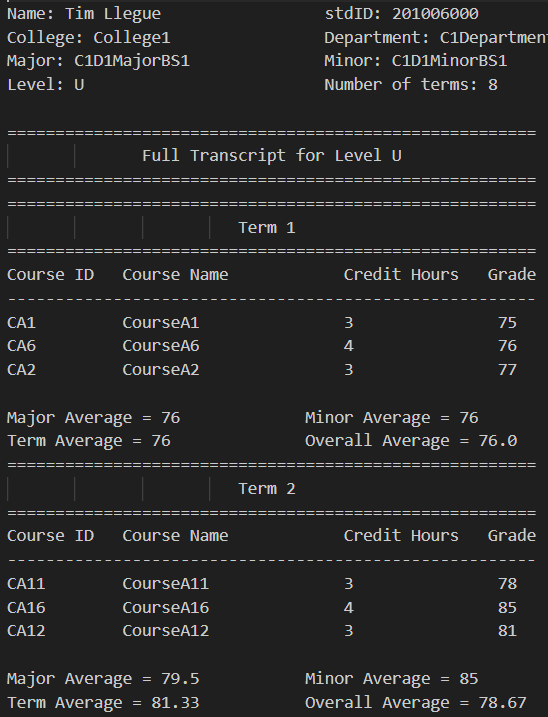 
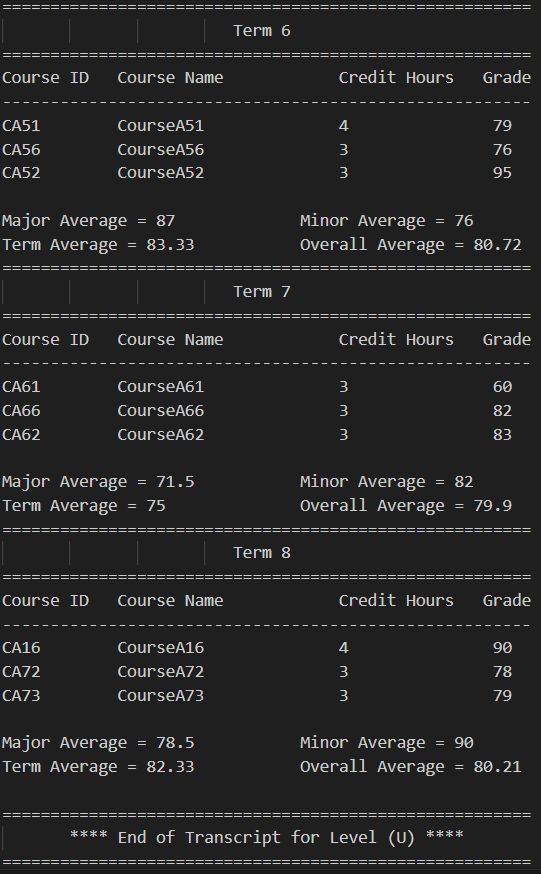
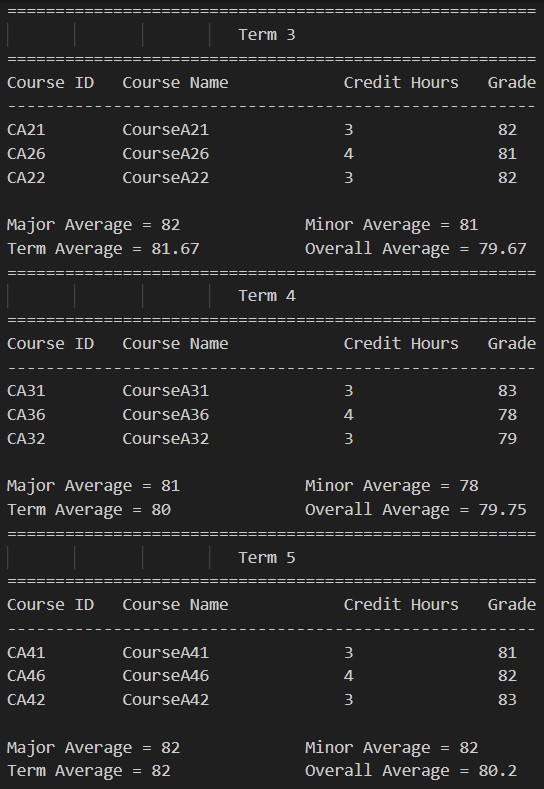

In [ ]:
def previousRequestsFeature(stdID, stdDegree, stdLevel):
    try:
        # Attempt to open the file containing previous requests for the student
        with open(f"{stdID}PreviousRequests.txt", "r") as f:
            text = f.read()  # Read the entire content of the file
            print()  # Print an empty line for readability
            print(text)  # Print the contents of the file (previous requests)
    except FileNotFoundError:
        # If the file is not found, print an error message
        print(f"No previous requests found for student ID {stdID}.")
    
    # Clear the output after a brief delay (helps tidy up the interface/console)
    clearOutput(5)

The `previousRequestsFeature()` function handles the retrieval and display of a student's previous transcript requests. It attempts to open a file named after the student's ID (e.g., `stdIDPreviousRequests.txt`) and reads its content, which contains information about the student's prior requests. If the file exists, the function prints the previous request details for the user to view. If the file is not found (indicating no prior requests), an error message is displayed informing the user of the absence of previous requests for that student. After displaying the content or error message, the function clears the screen after a short delay to tidy up the interface.

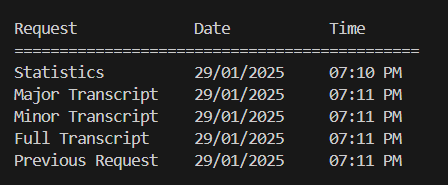

In [ ]:
def newStudentFeature():
    print("Preparing for a new student...")
    clearOutput(3)
    print("Redirecting you to the main menu...")
    clearOutput(3)
    #Return back to the start feature for new student
    startFeature()


The `newStudentFeature()` function is designed to prepare the system for processing a new student's data. When invoked, it prints a message indicating that preparations are underway for a new student. After a brief delay, another message is displayed, informing the user that they will be redirected to the main menu. The function then clears the screen twice during the process for a cleaner interface. Finally, it calls the `startFeature()` function to return to the start of the system, where the user can input a new student's details and continue with their work.

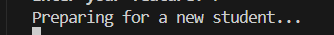
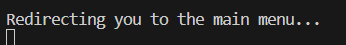
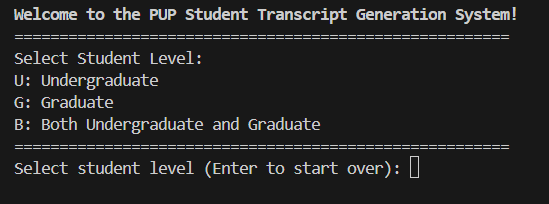


In [ ]:
def terminateFeature(requestCounter):
    print("Terminating the program...")
    
    # Clear the output after 3 seconds
    clearOutput(3)
    # This gives the user a summary of the session
    print(
        f"{'=' * 60}\nNumber of request: {requestCounter}\nThank you for using the Student Transcript Generation System\n{'=' * 60}")

    sys.exit()  # Stops the program execution completely


The `terminateFeature(requestCounter)` function is used to terminate the program and provide a summary of the user's session. When called, it prints a message indicating that the program is terminating. After waiting for a brief period (3 seconds) by calling `clearOutput(3)` to clean up the interface, it displays a summary, including the total number of requests made during the session (using the `requestCounter`) and a thank-you note for using the system. Finally, it calls `sys.exit()` to halt the program's execution completely, ending the session.


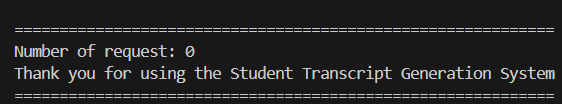